In [5]:
import pandas as pd
import spacy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [7]:
df = pd.read_csv("Fake_Real_Data.csv")
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9900 entries, 0 to 9899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    9900 non-null   object
 1   label   9900 non-null   object
dtypes: object(2)
memory usage: 154.8+ KB


In [9]:
df.describe()

,Text,label
count,9900,9900
unique,9865,2
top,Highlights: The Trump presidency on April 13 a...,Fake
freq,8,5000


In [10]:
df.shape

(9900, 2)

In [11]:
df.columns

Index(['Text', 'label'], dtype='object')

In [12]:
df.index

RangeIndex(start=0, stop=9900, step=1)

In [13]:
df.dtypes

Text     object
label    object
dtype: object

In [14]:
df["label_num"] = df["label"].map({"Real":0,"Fake":1})

In [17]:
nlp = spacy.load("en_core_web_lg")

In [20]:
df["vec"] = df["Text"].apply(lambda x: nlp(x).vector)

In [21]:
df

,Text,label,label_num,vec
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,1,"[-0.6759837, 1.4263071, -2.318466, -0.451093, ..."
1,U.S. conservative leader optimistic of common ...,Real,0,"[-1.8355803, 1.3101058, -2.4919677, 1.0268308,..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,0,"[-1.9851209, 0.14389805, -2.4221718, 0.9133005..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,1,"[-2.7812982, -0.16120885, -1.609772, 1.3624227..."
4,Democrats say Trump agrees to work on immigrat...,Real,0,"[-2.2010763, 0.9961637, -2.4088492, 1.128273, ..."
...,...,...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake,1,"[-1.6682401, 0.78006977, -2.2337353, -0.159771..."
9896,Trump consults Republican senators on Fed chie...,Real,0,"[-1.9297235, 0.8007302, -1.8990824, 0.42668718..."
9897,Trump lawyers say judge lacks jurisdiction for...,Real,0,"[-1.5289013, 1.0250993, -1.9861357, 0.4278564,..."
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake,1,"[-1.3928099, 0.7792715, -2.2072845, 0.13192406..."


In [22]:
df.label.value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [25]:
df["vec"].shape

(9900,)

In [26]:
x_train,x_test,y_train,y_test = train_test_split(df["vec"].values,df["label_num"],test_size=0.2)

In [31]:
x_train = np.stack(x_train)
x_test = np.stack(x_test)

In [33]:
mx = MinMaxScaler(feature_range=(0,1))
sc_x_train = mx.fit_transform(x_train)
sc_x_test = mx.transform(x_test)

In [36]:
sc_x_train[:1]

array([[0.6216103 , 0.8250892 , 0.42576283, 0.46624267, 0.46646935,
        0.6992041 , 0.5808909 , 0.76391083, 0.29124248, 0.4201812 ,
        0.61945105, 0.44828522, 0.49437314, 0.49439198, 0.52292675,
        0.4849766 , 0.39212427, 0.34064   , 0.42617756, 0.59030855,
        0.5585915 , 0.55129975, 0.6910621 , 0.4502114 , 0.3972602 ,
        0.28709596, 0.52565116, 0.73934203, 0.44505888, 0.40871978,
        0.72762156, 0.5330418 , 0.50015986, 0.6736288 , 0.31008536,
        0.58410025, 0.41674536, 0.582449  , 0.3438892 , 0.524724  ,
        0.33444858, 0.5993226 , 0.5884028 , 0.4002438 , 0.47108704,
        0.46160668, 0.42381725, 0.41736192, 0.23465231, 0.81960166,
        0.69824684, 0.42865136, 0.6099558 , 0.4001261 , 0.5973952 ,
        0.15911181, 0.8809644 , 0.26124796, 0.588917  , 0.46040198,
        0.48138243, 0.45051262, 0.5279727 , 0.50786483, 0.6120822 ,
        0.5663095 , 0.68751323, 0.37655   , 0.4657685 , 0.39275268,
        0.74166274, 0.38152137, 0.53819084, 0.10

In [37]:
sc_x_test[5:6]

array([[0.45970437, 0.44693035, 0.4735149 , 0.5088675 , 0.7567313 ,
        0.45678854, 0.42990902, 0.7490912 , 0.55658734, 0.5388236 ,
        0.63692874, 0.56892097, 0.39968574, 0.6673614 , 0.60997486,
        0.5966992 , 0.41258565, 0.5867751 , 0.4732386 , 0.4353149 ,
        0.6864517 , 0.58551985, 0.4234536 , 0.61919963, 0.4424544 ,
        0.39585966, 0.40999687, 0.5097643 , 0.51111114, 0.49109483,
        0.67650205, 0.4744325 , 0.3086384 , 0.5496087 , 0.44704157,
        0.7885385 , 0.19967347, 0.67233825, 0.4824683 , 0.43089175,
        0.4788871 , 0.64210355, 0.5288653 , 0.443118  , 0.53759   ,
        0.48776096, 0.47564155, 0.4651907 , 0.4761736 , 0.61442995,
        0.65164167, 0.59098613, 0.49847853, 0.27062833, 0.62105167,
        0.40798572, 0.5039216 , 0.5139364 , 0.50826365, 0.37796894,
        0.39055994, 0.45753908, 0.50401783, 0.509516  , 0.6151886 ,
        0.5638579 , 0.5653829 , 0.43811142, 0.47878754, 0.60620296,
        0.4460867 , 0.38304034, 0.3935408 , 0.46

In [38]:
nb = MultinomialNB()
nb.fit(sc_x_train,y_train)
nb_pred = nb.predict(sc_x_test)

In [39]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       960
           1       0.96      0.94      0.95      1020

    accuracy                           0.94      1980
   macro avg       0.94      0.95      0.94      1980
weighted avg       0.95      0.94      0.94      1980



<Axes: >

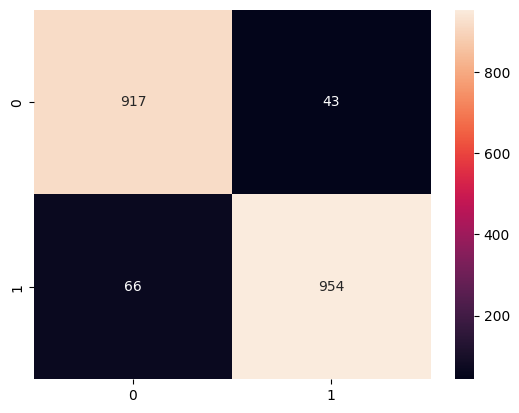

In [41]:
cm = confusion_matrix(y_test,nb_pred)
sns.heatmap(cm,annot=True,fmt='.3g')

In [43]:
from warnings import filterwarnings
filterwarnings("ignore")

In [44]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(sc_x_train,y_train)
knn_pred = knn.predict(sc_x_test)
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       960
           1       1.00      0.99      0.99      1020

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



<Axes: >

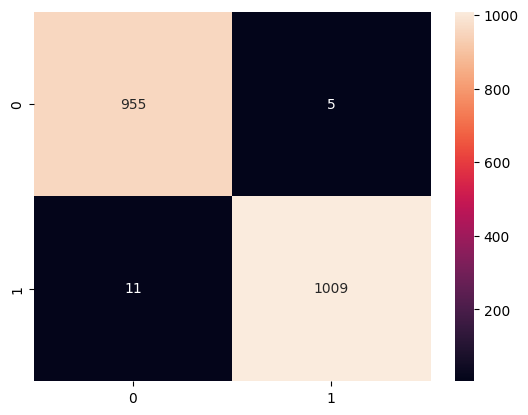

In [45]:
cm = confusion_matrix(y_test,knn_pred)
sns.heatmap(cm,annot=True,fmt='d')